# Курс «Машинное обучение в бизнесе»

## Урок 3. Кейс 1. Работа с признаками и селекция

### Домашнее задание к уроку 3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import itertools

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
import os

import warnings

#### Задание 1

Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [4]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


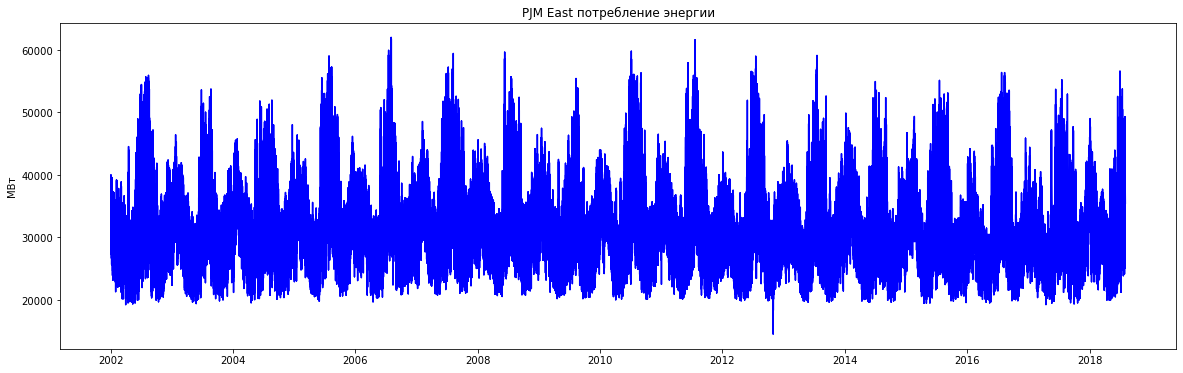

In [5]:
plt.figure(figsize =(20,6))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [6]:
data_m = data['PJME_MW'].resample('M').mean()

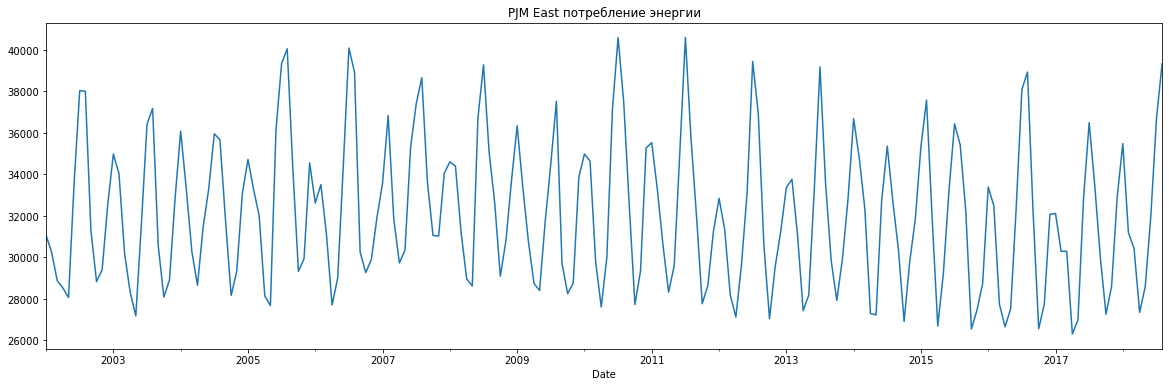

In [7]:
data_m.plot(figsize=(20, 6), title='PJM East потребление энергии')

#### Задание 2

Подберите параметры модели SARIMAX для этого ряда.

In [8]:
data_d = data.copy().resample('D').mean()
data_m = data.resample('M').mean()
data_w = data.resample('W').mean()
data_Y = data.resample('3M').mean()

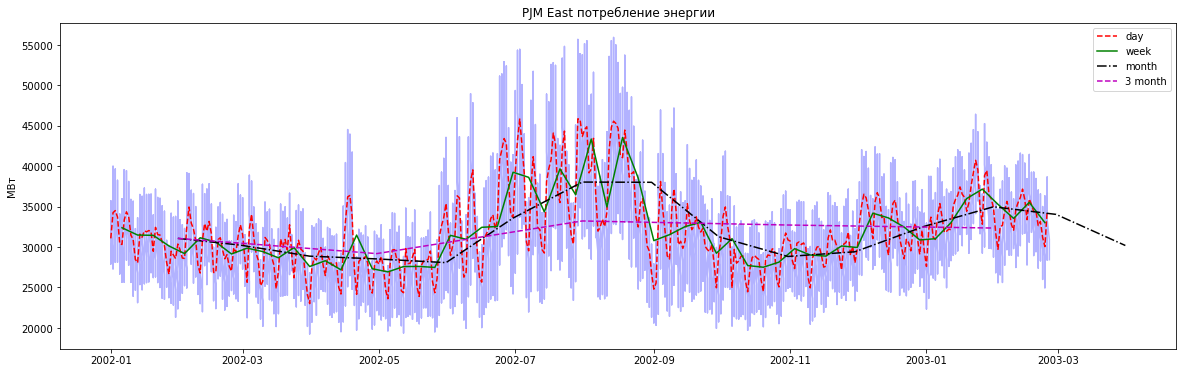

In [9]:
plt.figure(figsize =(20,6))
plt.plot( data.index[:5*24*7*4*3], data['PJME_MW'].values[:5*24*7*4*3], 'b',alpha =0.3 )
plt.plot( data_d.index[:5*7*4*3], data_d['PJME_MW'].values[:5*7*4*3], '--r',label='day' )
plt.plot( data_w.index[:5*4*3], data_w['PJME_MW'].values[:5*4*3], 'g',label='week'  )
plt.plot( data_m.index[:5*3], data_m['PJME_MW'].values[:5*3], '-.k',label='month'  )
plt.plot( data_Y.index[:5], data_Y['PJME_MW'].values[:5], '--m',label='3 month'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.show()

Построим графики автокорреляции и ее частоты.

Исходные данные

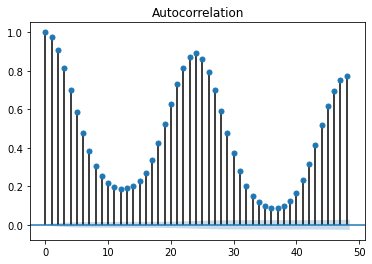

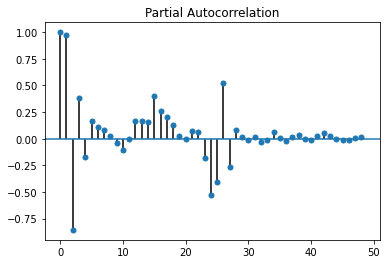

In [10]:
sm.graphics.tsa.plot_acf(data['PJME_MW'].values, lags=24*2)
plt.show()
sm.graphics.tsa.plot_pacf(data['PJME_MW'].values, lags=24*2)
plt.show()

Дневные данные

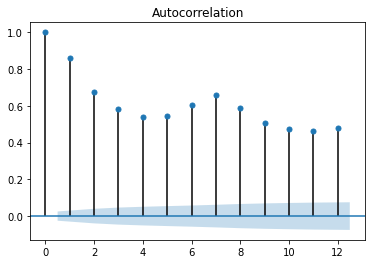

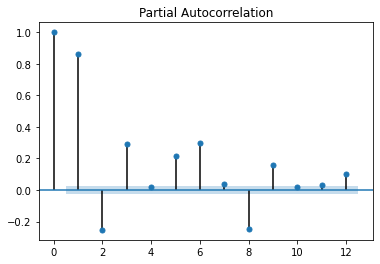

In [11]:
sm.graphics.tsa.plot_acf(data_d['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_d['PJME_MW'].values, lags=12)
plt.show()

Недельные данные

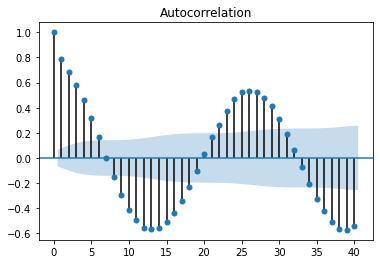

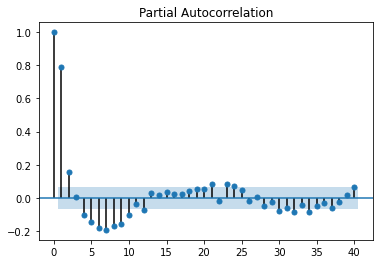

In [12]:
sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=40)
plt.show()

Месячные данные

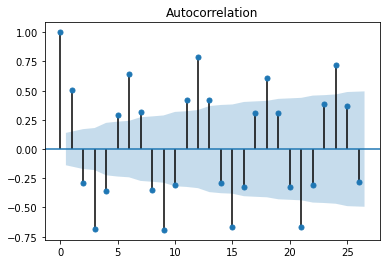

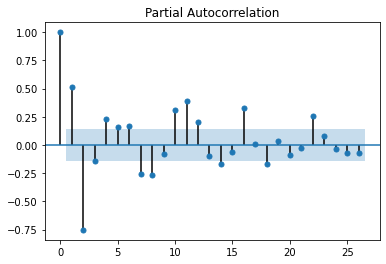

In [13]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=26)
plt.show()

Годовые данные.

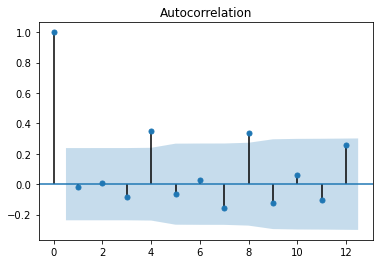

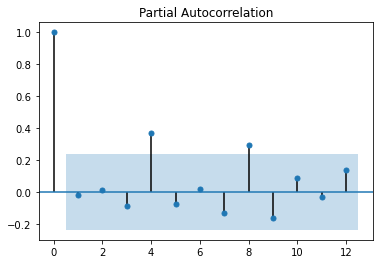

In [14]:
sm.graphics.tsa.plot_acf(data_Y['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_Y['PJME_MW'].values, lags=12)
plt.show()

Зададим p, d и q и зададим сезонность этих параметров.
Будем работать с месячными данными, тогда сезонность это 12 месяцев

In [15]:
q = 2
p = 1
d = 2
pdq = [p, d, q]
qs = 1
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs ,12] 

In [16]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [1, 2, 2]    : ps,ds,qs, S= [0, 0, 1, 12]


Для построения модели используем все данные, кроме 2-х последних месяцев (это будет тестовый набор)

In [17]:
warnings.filterwarnings("ignore")

In [18]:
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-60],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[1, 2, 2]x[0, 0, 1, 12] - AIC:2314.2164124692213


In [19]:
print(results.summary().tables[0],results.summary().tables[1])

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  140
Model:             SARIMAX(1, 2, 2)x(0, 0, [1], 12)   Log Likelihood               -1152.108
Date:                              Thu, 16 Jul 2020   AIC                           2314.216
Time:                                      21:10:17   BIC                           2328.277
Sample:                                           0   HQIC                          2319.928
                                              - 140                                         
Covariance Type:                                opg                                         
============================================================================================ ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----

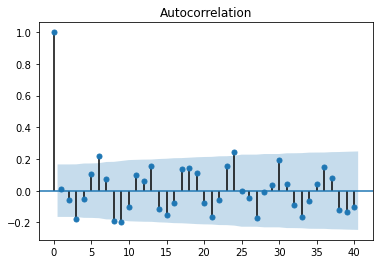

In [20]:
sm.graphics.tsa.plot_acf(results.resid, lags=40)
plt.show()

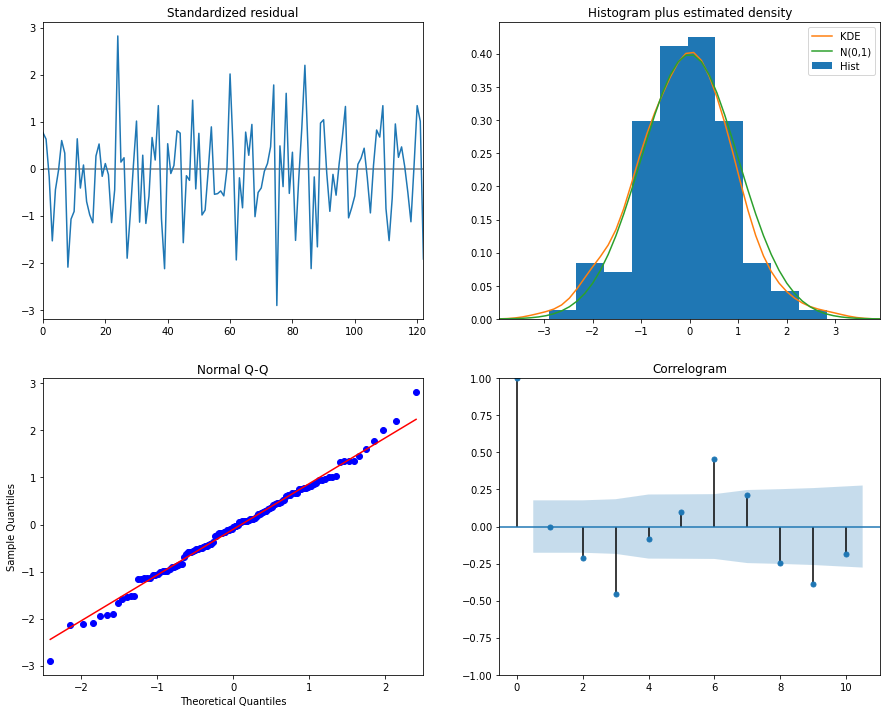

In [21]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [22]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [23]:
min_aic = 100000.0
min_param = list()
min_param_seasonal = list()
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-60],order=param,
                                seasonal_order=param_seasonal ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < min_aic:
                min_aic = results.aic
                min_param = param
                min_param_seasonal = param_seasonal
        except:
            continue
print()
print('MIN ARIMA{}x{}3 - AIC:{}'.format(min_param, min_param_seasonal, min_aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:3285.5341467213893
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:2918.7442060146113
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:2625.182438144253
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:2285.348974361187
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2061.6953106234973
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:1829.5843433034186
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:3163.7003981328353
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:2866.461333671925
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:2590.98239026097
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:2253.865227611156
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:2035.0580333076482
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:1801.1731069236666
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:3119.411285228751
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:2840.9378853273115
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:2569.233345259142
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:2238.904761101151
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:2018.5171149830273
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:1785.8605008743943
ARIMA(0, 1, 0)x(0, 

ARIMA(2, 2, 1)x(0, 0, 2, 12)3 - AIC:2084.9913004873424
ARIMA(2, 2, 1)x(0, 1, 0, 12)3 - AIC:2287.552921967368
ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:2021.150817540772
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:1781.594530952149
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:2478.1092507722246
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:2254.9599312755163
ARIMA(2, 2, 2)x(0, 0, 2, 12)3 - AIC:2040.5247006282596
ARIMA(2, 2, 2)x(0, 1, 0, 12)3 - AIC:2265.2124184404624
ARIMA(2, 2, 2)x(0, 1, 1, 12)3 - AIC:1963.1026535323097
ARIMA(2, 2, 2)x(0, 1, 2, 12)3 - AIC:1780.5163213521112

MIN ARIMA(1, 2, 2)x(0, 1, 2, 12)3 - AIC:1756.464186306245


Лучшие результаты на недельных данных параметры модели ARIMA(0, 1, 2)x(0, 1, 2, 12)3 - AIC:2784.9726407272947

Для построения модели используем все данные, кроме 2-х последних месяцев (это будет тестовый набор)

In [24]:
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-60],order=min_param,
                                seasonal_order=min_param_seasonal,
                                enforce_stationarity= False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 1756.464186306245


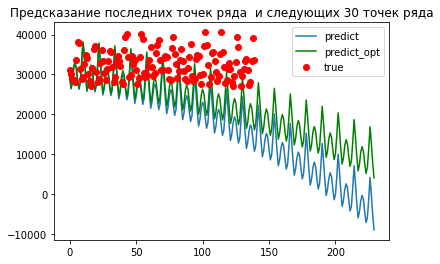

In [25]:
pred_dynamic = results.forecast(230)
pred_dynamic_opt = results_opt.forecast(230)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[:-60],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

#### Задание 3

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Модель стала более регулярной, т.е. форма исходных данных повторяется, но видимо есть некоторое расхождение в конце.

#### Задание 4

Возмите вариант 1 или 2

Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)  
Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [26]:
data = pd.read_csv('covid_19_data (3).csv', index_col=[1], parse_dates=[1])

In [27]:
data.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [28]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,14491.00000,14491.000000,14491.000000,14491.000000
mean,7246.00000,1884.213650,96.049962,461.239666
std,4183.33571,10414.711173,831.546009,3875.410927
min,1.00000,0.000000,0.000000,0.000000
25%,3623.50000,6.000000,0.000000,0.000000
50%,7246.00000,66.000000,0.000000,1.000000
75%,10868.50000,435.000000,5.000000,32.000000
max,14491.00000,189033.000000,19899.000000,64281.000000


In [29]:
data["Country/Region"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [30]:
df = data[data["Country/Region"] == 'Russia']

In [31]:
df.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-31,483,NaN,Russia,1/31/2020 23:59,2.0,0.0,0.0
2020-02-01,541,NaN,Russia,1/31/2020 16:13,2.0,0.0,0.0
2020-02-02,611,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
2020-02-03,678,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
2020-02-04,746,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0


In [32]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,73.000000,73.000000,73.000000,73.000000
mean,5350.013699,1462.767123,11.013699,100.109589
std,4213.931199,3329.313186,26.465645,245.244185
min,483.000000,2.000000,0.000000,0.000000
25%,1769.000000,2.000000,0.000000,2.000000
50%,3851.000000,13.000000,0.000000,2.000000
75%,8638.000000,658.000000,3.000000,29.000000
max,14306.000000,15770.000000,130.000000,1291.000000


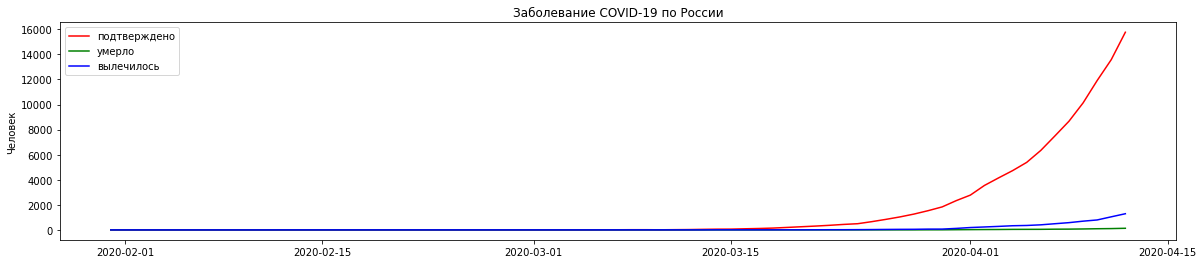

In [33]:
plt.figure(figsize =(20,4))
plt.plot(df.index, df['Confirmed'], 'r', label ='подтверждено')
plt.plot(df.index, df['Deaths'], 'g', label ='умерло')
plt.plot(df.index, df['Recovered'], 'b', label ='вылечилось')
plt.title('Заболевание COVID-19 по России')
plt.ylabel('Человек')
plt.legend()
plt.show()

Прологарифмируем значения.

In [34]:
df['Confirmed'] = np.log(df['Confirmed'])

In [35]:
df['Deaths'] = np.log(df['Deaths'])
df.loc[df['Deaths'] == -np.inf, 'Deaths'] = 0

In [36]:
df['Recovered'] = np.log(df['Recovered'])
df.loc[df['Recovered'] == -np.inf, 'Recovered'] = 0

In [37]:
df.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-31,483,NaN,Russia,1/31/2020 23:59,0.693147,0.0,0.0
2020-02-01,541,NaN,Russia,1/31/2020 16:13,0.693147,0.0,0.0
2020-02-02,611,NaN,Russia,2020-01-31T16:13:45,0.693147,0.0,0.0
2020-02-03,678,NaN,Russia,2020-01-31T16:13:45,0.693147,0.0,0.0
2020-02-04,746,NaN,Russia,2020-01-31T16:13:45,0.693147,0.0,0.0


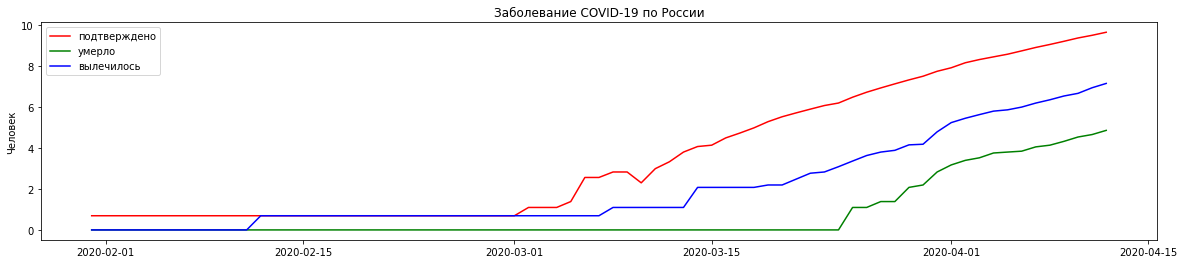

In [38]:
plt.figure(figsize =(20,4))
plt.plot(df.index, df['Confirmed'], 'r', label ='подтверждено')
plt.plot(df.index, df['Deaths'], 'g', label ='умерло')
plt.plot(df.index, df['Recovered'], 'b', label ='вылечилось')
plt.title('Заболевание COVID-19 по России')
plt.ylabel('Человек')
plt.legend()
plt.show()

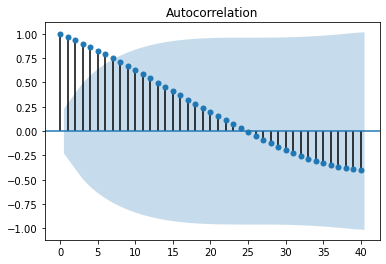

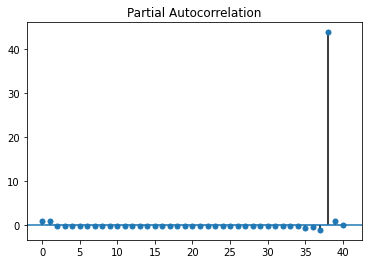

In [39]:
sm.graphics.tsa.plot_acf(df['Confirmed'].values, lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(df['Confirmed'].values, lags=40)
plt.show()

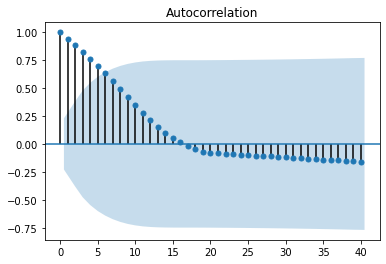

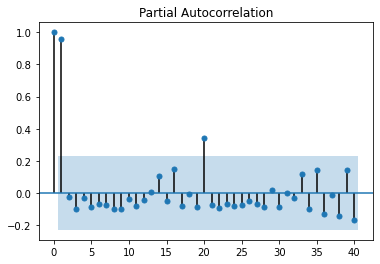

In [40]:
sm.graphics.tsa.plot_acf(df['Deaths'].values, lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(df['Deaths'].values, lags=40)
plt.show()

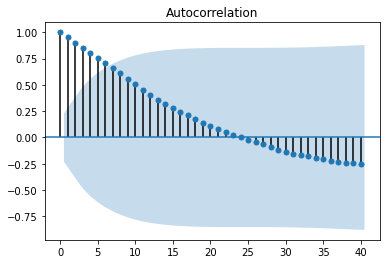

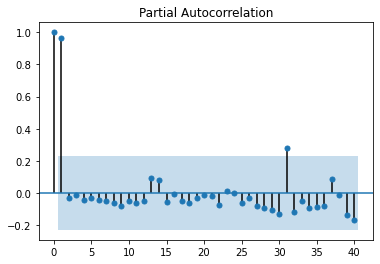

In [41]:
sm.graphics.tsa.plot_acf(df['Recovered'].values, lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(df['Recovered'].values, lags=40)
plt.show()

In [42]:
def get_arima_param(data, field, period, offset):
    warnings.filterwarnings("ignore")
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    p = [0] 
    d = [0,1]
    q = range(0, 3)
    seasonal_pdq = [(x[0], x[1], x[2], period) for x in list(itertools.product(p, d, q))]
    min_aic = 100000.0
    min_param = list()
    min_param_seasonal = list()
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(data[field].values[:-offset],order=param,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity= False,
                                    enforce_invertibility=False)
                results = mod.fit()
                print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
                if abs(results.aic) < min_aic:
                    min_aic = results.aic
                    min_param = param
                    min_param_seasonal = param_seasonal
            except Exception as inst:
                print(type(inst))
                print(inst.args)
                print(inst)
                continue
    print()
    print('MIN ARIMA{}x{}3 - AIC:{}'.format(min_param, min_param_seasonal, min_aic))
    return min_param, min_param_seasonal

In [43]:
conf_param, conf_param_seasonal = get_arima_param(df, 'Confirmed', 100, 15)

ARIMA(0, 0, 0)x(0, 0, 0, 100)3 - AIC:295.88349426137796
ARIMA(0, 0, 0)x(0, 0, 1, 100)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 0, 2, 100)3 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 0, 100)3 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 100)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 2, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 100)3 - AIC:223.58187600549357
ARIMA(0, 0, 1)x(0, 0, 1, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 2, 100)3 - AIC:8.0
ARIMA(0, 0, 1)x(0, 1, 0, 100)3 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 2, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 0, 100)3 - AIC:173.72357520073368
ARIMA(0, 0, 2)x(0, 0, 1, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 2, 100)3 - AIC:10.0
ARIMA(0, 0, 2)x(0, 1, 0, 100)3 - AIC:6.0
ARIMA(0, 0, 2)x(0, 1, 1, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 1, 2, 100)3 - AIC:10.0
ARIMA(0, 1, 0)x(0, 0, 0, 100)3 - AIC:7.592637801012962
ARIMA(0, 1, 0)x(0, 0, 1, 100)3 - AIC:4.0
ARIMA(0, 1, 0)x(0, 0, 2, 100)3 - AIC:6.0
ARIMA(0, 1, 0)x(0, 1, 0, 100)3 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 100)3 - AIC:

In [44]:
death_param, death_param_seasonal = get_arima_param(df, 'Deaths', 100, 15)

ARIMA(0, 0, 0)x(0, 0, 0, 100)3 - AIC:37.83077364618923
ARIMA(0, 0, 0)x(0, 0, 1, 100)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 0, 2, 100)3 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 0, 100)3 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 100)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 2, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 100)3 - AIC:-1.9544729981848938
ARIMA(0, 0, 1)x(0, 0, 1, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 2, 100)3 - AIC:8.0
ARIMA(0, 0, 1)x(0, 1, 0, 100)3 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 2, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 0, 100)3 - AIC:-14.350631053207621
ARIMA(0, 0, 2)x(0, 0, 1, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 2, 100)3 - AIC:10.0
ARIMA(0, 0, 2)x(0, 1, 0, 100)3 - AIC:6.0
ARIMA(0, 0, 2)x(0, 1, 1, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 1, 2, 100)3 - AIC:10.0
ARIMA(0, 1, 0)x(0, 0, 0, 100)3 - AIC:-50.2512080911831
ARIMA(0, 1, 0)x(0, 0, 1, 100)3 - AIC:4.0
ARIMA(0, 1, 0)x(0, 0, 2, 100)3 - AIC:6.0
ARIMA(0, 1, 0)x(0, 1, 0, 100)3 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 100)3 - AIC

In [45]:
recov_param, recov_param_seasonal = get_arima_param(df, 'Recovered', 100, 15)

ARIMA(0, 0, 0)x(0, 0, 0, 100)3 - AIC:213.40191831179243
ARIMA(0, 0, 0)x(0, 0, 1, 100)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 0, 2, 100)3 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 0, 100)3 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 100)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 2, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 100)3 - AIC:148.63754090721204
ARIMA(0, 0, 1)x(0, 0, 1, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 2, 100)3 - AIC:8.0
ARIMA(0, 0, 1)x(0, 1, 0, 100)3 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 100)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 2, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 0, 100)3 - AIC:101.37123712156628
ARIMA(0, 0, 2)x(0, 0, 1, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 2, 100)3 - AIC:10.0
ARIMA(0, 0, 2)x(0, 1, 0, 100)3 - AIC:6.0
ARIMA(0, 0, 2)x(0, 1, 1, 100)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 1, 2, 100)3 - AIC:10.0
ARIMA(0, 1, 0)x(0, 0, 0, 100)3 - AIC:-24.528431339157827
ARIMA(0, 1, 0)x(0, 0, 1, 100)3 - AIC:4.0
ARIMA(0, 1, 0)x(0, 0, 2, 100)3 - AIC:6.0
ARIMA(0, 1, 0)x(0, 1, 0, 100)3 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 100)3 - AI

In [46]:
warnings.filterwarnings("ignore") # отключает предупреждения
mod = sm.tsa.statespace.SARIMAX(df['Confirmed'].values[0:-15],order=conf_param,
                                seasonal_order=conf_param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
conf_results_opt = mod.fit()
print('AIC:', conf_results_opt.aic)

AIC: -1.6621051786367431


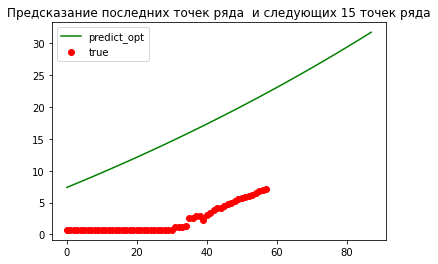

In [47]:
conf_pred_dynamic_opt = conf_results_opt.forecast(88)
plt.plot(conf_pred_dynamic_opt,'g', label='predict_opt' )
plt.plot(df['Confirmed'].values[0:-15],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 15 точек ряда')
plt.legend()
plt.show()

In [48]:
warnings.filterwarnings("ignore") # отключает предупреждения
mod = sm.tsa.statespace.SARIMAX(df['Deaths'].values[0:-15],order=death_param,
                                seasonal_order=death_param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
death_results_opt = mod.fit()
print('AIC:', death_results_opt.aic)

AIC: -1.9544729981848938


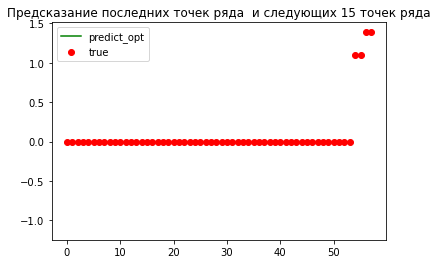

In [49]:
death_pred_dynamic_opt = np.log(death_results_opt.forecast(88))
plt.plot(death_pred_dynamic_opt,'g', label='predict_opt' )
plt.plot(df['Deaths'].values[0:-15],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 15 точек ряда')
plt.legend()
plt.show()

In [50]:
warnings.filterwarnings("ignore") # отключает предупреждения
mod = sm.tsa.statespace.SARIMAX(df['Recovered'].values[0:-15],order=recov_param,
                                seasonal_order=recov_param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recov_death_results_opt = mod.fit()
print('AIC:', recov_death_results_opt.aic)

AIC: 2.0


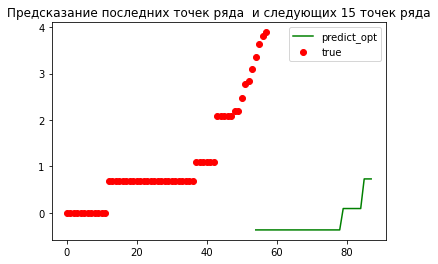

In [51]:
recov_pred_dynamic_opt = np.log(recov_death_results_opt.forecast(88))
plt.plot(recov_pred_dynamic_opt,'g', label='predict_opt' )
plt.plot(df['Recovered'].values[0:-15],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 15 точек ряда')
plt.legend()
plt.show()

##### Задание 5

Оцените результат моделирования.

Улучшеная модель ближе к точкам выборки на отрезке предсказания. Однако общий результат моделирования еще далек от идеала. Проверим остатки модели.

In [52]:
print(sm.tsa.stattools.adfuller(conf_results_opt.resid))

(-8.791122523299176, 2.239149416664898e-14, 0, 57, {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}, 1.3261489776106004)


In [53]:
print(sm.tsa.stattools.adfuller(death_results_opt.resid))

(1.3820610798032833, 0.9970311049192268, 1, 56, {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}, -31.963093123515804)


In [54]:
print(sm.tsa.stattools.adfuller(recov_death_results_opt.resid))

(1.8382855964165068, 0.9984220028135559, 0, 57, {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}, -18.168789632245634)


В целом модель описывает поведение системы во времени

#### Задание 6

Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе ARIMA.

В целом это работает.